In [3]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
from matplotlib import style
style.use('default')

from datetime import timedelta
import glob

In [5]:
# # Custom callback to log MAE and RMSE
# class MetricsLogger(Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if logs is None:
#             logs = {}
#         train_mae = logs.get('mae')
#         val_mae = logs.get('val_mae')
#         print(f'Epoch {epoch+1}: Train MAE: {train_mae:.4f}, Validation MAE: {val_mae:.4f}')


In [7]:
# Load and preprocess electricity demand data
data_path = "Data/"
files = glob.glob(data_path + "Native_*.xlsx")
df = pd.read_excel(files[4])

In [8]:
files

['Data\\Native_Load_2018.xlsx',
 'Data\\Native_Load_2019.xlsx',
 'Data\\Native_Load_2020.xlsx',
 'Data\\Native_Load_2021.xlsx',
 'Data\\Native_Load_2022.xlsx',
 'Data\\Native_Load_2023.xlsx',
 'Data\\Native_Load_2024.xlsx']

In [9]:
df

,Hour Ending,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2022 01:00,12054.939199,1302.296674,4161.193625,757.843076,9676.300802,3172.878316,5908.031505,973.455700,38006.938896
1,01/01/2022 02:00,11793.290315,1259.355201,4147.907009,737.236591,9307.126712,3123.318608,5708.512022,959.775908,37036.522365
2,01/01/2022 03:00,11460.841252,1210.287905,4156.412366,725.610502,8920.424552,3003.396233,5463.522829,941.112359,35881.607998
3,01/01/2022 04:00,11244.980243,1179.311517,4149.811722,717.420214,8678.807826,2898.097471,5255.252404,920.373708,35044.055105
4,01/01/2022 05:00,11073.085585,1171.841803,4140.619028,719.178247,8573.370608,2825.100402,5164.172158,918.203309,34585.571140
...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2022 20:00,10247.562908,1407.683729,5218.996613,938.901362,11656.958118,3452.868539,6833.564855,1125.338906,40881.875030
8756,12/31/2022 21:00,9887.676773,1362.637978,5217.501326,963.913723,11242.914145,3228.129723,6629.002740,1103.919231,39635.695638
8757,12/31/2022 22:00,9572.382483,1327.298817,5235.313653,949.798259,10944.369192,3078.543411,6413.225604,1084.122587,38605.054006
8758,12/31/2022 23:00,9258.586996,1237.913479,5226.630655,928.929373,10508.050809,3020.175467,6161.413424,1058.601615,37400.301819


In [10]:
# file='Data\\Native_Load_2022.xlsx'

In [11]:
# from datetime import timedelta
# import pandas as pd
# skiprows = []
# df = pd.read_excel(file, header=0, skiprows=skiprows)
# df.columns = [c.replace(' ', '_') for c in df.columns]
# df = df.rename(columns={'Hour_Ending': 'Timestamp'})

# df['datetime_zero'] = df['Timestamp'].str.replace('24:00', '0:00')
# df['datetime_er'] = pd.to_datetime(df['datetime_zero'], format='%m/%d/%Y %H:%M', errors='coerce')
# df = df.loc[~df.datetime_er.isnull()]
# selrow = df['Timestamp'].str.contains('24:00')
# df['datetime_obj'] = df['datetime_er'] + selrow * timedelta(days=1)

In [14]:
df.count()

Hour Ending    8760
COAST          8760
EAST           8760
FWEST          8760
NORTH          8760
NCENT          8760
SOUTH          8760
SCENT          8760
WEST           8760
ERCOT          8760
dtype: int64

In [19]:
def csvfileread(file):
    skiprows = []
    from datetime import timedelta
    import pandas as pd
    df = pd.read_excel(file, header=0, skiprows=skiprows)
    df.columns = [c.replace(' ', '_') for c in df.columns]
    df = df.rename(columns={'Hour_Ending': 'Timestamp'})
    

    df['datetime_zero'] = df['Timestamp'].str.replace('24:00', '0:00')
    df['datetime_er'] = pd.to_datetime(df['datetime_zero'], format='%m/%d/%Y %H:%M', errors='coerce')
    df = df.loc[~df.datetime_er.isnull()]
    selrow = df['Timestamp'].str.contains('24:00')
    df['datetime_obj'] = df['datetime_er'] + selrow * timedelta(days=1)

    df0 = pd.DataFrame()
    df0['ERCOT'] = df['ERCOT'].copy()
    df0['datetime_obj'] = df['datetime_obj'].copy()

    return df0

In [21]:
filenames = glob.glob(data_path + "Native_*.xlsx")
for i, file in enumerate(filenames):
    print(i)
    if i == 0:
        df1 = csvfileread(file)
        df_load = df1
    else:
        df1 = csvfileread(file)
        df_load = pd.concat([df_load, df1], axis=0)

    df_load= df_load.sort_index()

0
1
2
3
4
5
6


In [22]:
df_load

,ERCOT,datetime_obj
0,50567.069682,2018-01-01 01:00:00
0,38006.938896,2022-01-01 01:00:00
0,37081.443439,2019-01-01 01:00:00
0,41223.480177,2024-01-01 01:00:00
0,36824.115099,2020-01-01 01:00:00
...,...,...
8781,46754.840878,2020-12-31 22:00:00
8782,45475.412261,2020-12-31 23:00:00
8782,44779.606498,2024-12-31 23:00:00
8783,44503.547341,2021-01-01 00:00:00


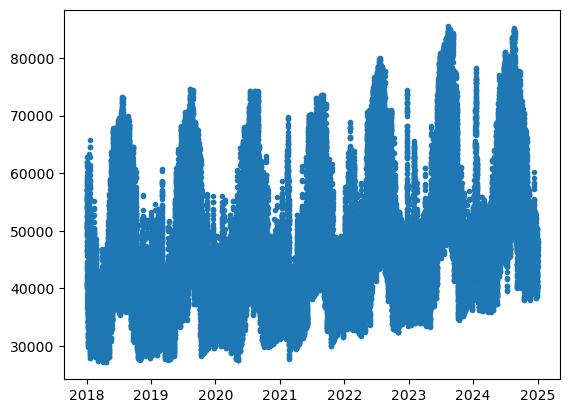

In [25]:
df_load = df_load.rename(columns={'datetime_obj': 'timestamp'})
df_load['timestamp'] = pd.to_datetime(df_load['timestamp'])
df_load=df_load.set_index('timestamp').sort_index()
df_load = df_load[~df_load.index.duplicated(keep='first')]
plt.plot(df_load.ERCOT, '.')

In [27]:
df_load

,ERCOT
timestamp,
2018-01-01 01:00:00,50567.069682
2018-01-01 02:00:00,50617.087977
2018-01-01 03:00:00,50694.300087
2018-01-01 04:00:00,50999.591693
2018-01-01 05:00:00,51723.732017
...,...
2024-12-31 20:00:00,47619.264355
2024-12-31 21:00:00,46737.678611
2024-12-31 22:00:00,45775.649767


In [29]:
df_load=df_load.resample('60min').mean()

In [31]:
df_load.to_csv(data_path+'Native_Load_all.csv')

In [33]:
# Load data
filename = data_path + '/Native_Load_all.csv'
df_load= pd.read_csv(filename)


In [35]:
df_load

,timestamp,ERCOT
0,2018-01-01 01:00:00,50567.069682
1,2018-01-01 02:00:00,50617.087977
2,2018-01-01 03:00:00,50694.300087
3,2018-01-01 04:00:00,50999.591693
4,2018-01-01 05:00:00,51723.732017
...,...,...
61363,2024-12-31 20:00:00,47619.264355
61364,2024-12-31 21:00:00,46737.678611
61365,2024-12-31 22:00:00,45775.649767
61366,2024-12-31 23:00:00,44779.606498


## Load different temperature and weather data

In [54]:
data_path

'Data/'

In [64]:
# Load and preprocess electricity demand data
file_paths = glob.glob(data_path + "Hourly weather data/Weather data (2017 to 2025)/"+ "asos_hourly_*.csv")


In [66]:
file_paths

['Data/Hourly weather data/Weather data (2017 to 2025)\\asos_hourly_BKS.csv',
 'Data/Hourly weather data/Weather data (2017 to 2025)\\asos_hourly_JDD.csv',
 'Data/Hourly weather data/Weather data (2017 to 2025)\\asos_hourly_TME.csv']

In [68]:
# Define a function to read and rename columns of a single file
def read_and_rename(file_path, suffix):
    print(suffix)
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])  
    df = df.rename(columns=lambda x: f"{x}_{suffix}" if x != 'timestamp' else x)
    index=df[f"tmpc_{suffix}"] < -20
    df[f"tmpc_{suffix}"][index]=np.nan

    index=df[f"sped_{suffix}"] > 50
    df[f"sped_{suffix}"][index]=np.nan

    return df

In [70]:
df

,Hour Ending,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2022 01:00,12054.939199,1302.296674,4161.193625,757.843076,9676.300802,3172.878316,5908.031505,973.455700,38006.938896
1,01/01/2022 02:00,11793.290315,1259.355201,4147.907009,737.236591,9307.126712,3123.318608,5708.512022,959.775908,37036.522365
2,01/01/2022 03:00,11460.841252,1210.287905,4156.412366,725.610502,8920.424552,3003.396233,5463.522829,941.112359,35881.607998
3,01/01/2022 04:00,11244.980243,1179.311517,4149.811722,717.420214,8678.807826,2898.097471,5255.252404,920.373708,35044.055105
4,01/01/2022 05:00,11073.085585,1171.841803,4140.619028,719.178247,8573.370608,2825.100402,5164.172158,918.203309,34585.571140
...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2022 20:00,10247.562908,1407.683729,5218.996613,938.901362,11656.958118,3452.868539,6833.564855,1125.338906,40881.875030
8756,12/31/2022 21:00,9887.676773,1362.637978,5217.501326,963.913723,11242.914145,3228.129723,6629.002740,1103.919231,39635.695638
8757,12/31/2022 22:00,9572.382483,1327.298817,5235.313653,949.798259,10944.369192,3078.543411,6413.225604,1084.122587,38605.054006
8758,12/31/2022 23:00,9258.586996,1237.913479,5226.630655,928.929373,10508.050809,3020.175467,6161.413424,1058.601615,37400.301819


In [72]:
# Read and rename columns of all files
dfs = [read_and_rename(file_paths[i], i+1) for i in range(len(file_paths))]

1


C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\1779252998.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f"tmpc_{suffix}"][index]=np.nan
C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\1779252998.py:8: SettingWithCopyWarning: 
A

2


C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\1779252998.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f"tmpc_{suffix}"][index]=np.nan
C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\1779252998.py:8: SettingWithCopyWarning: 
A

3


C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\1779252998.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f"tmpc_{suffix}"][index]=np.nan
C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\1779252998.py:8: SettingWithCopyWarning: 
A

In [74]:
dfs

[                 timestamp  tmpc_1  relh_1  sped_1  feel_1  p01m_1
 0      2017-01-01 00:15:00   15.28   95.80    0.00    59.5     0.0
 1      2017-01-01 00:35:00   15.28   95.80    0.00    59.5     0.0
 2      2017-01-01 00:55:00   15.56   96.15    8.05    59.9     0.0
 3      2017-01-01 01:15:00   15.78   95.81    3.45    60.4     0.0
 4      2017-01-01 01:35:00   16.00   95.14    0.00    60.8     0.0
 ...                    ...     ...     ...     ...     ...     ...
 196084 2025-01-03 22:35:00   17.11  100.00    4.60    62.8     0.0
 196085 2025-01-03 22:55:00   17.11  100.00    4.60    62.8     0.0
 196086 2025-01-03 23:15:00   17.11  100.00    4.60    62.8     0.0
 196087 2025-01-03 23:35:00   17.11  100.00    4.60    62.8     0.0
 196088 2025-01-03 23:55:00   17.11  100.00    0.00    62.8     0.0
 
 [196089 rows x 6 columns],
                  timestamp  tmpc_2  relh_2  sped_2  feel_2  p01m_2
 0      2017-01-01 00:15:00   13.00  100.00    0.00    55.4     0.0
 1      2017-01-01

In [76]:
# Merge all dataframes on 'timestamp'
df_weather = dfs[0]
for df in dfs[1:]:
    df_weather = pd.merge(df_weather, df, on='timestamp', how='outer')

In [78]:
# Display the merged dataframe
df_weather
#merged_df.head()

,timestamp,tmpc_1,relh_1,sped_1,feel_1,p01m_1,tmpc_2,relh_2,sped_2,feel_2,p01m_2,tmpc_3,relh_3,sped_3,feel_3,p01m_3
0,2017-01-01 00:15:00,15.28,95.80,0.00,59.5,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
1,2017-01-01 00:35:00,15.28,95.80,0.00,59.5,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
2,2017-01-01 00:55:00,15.56,96.15,8.05,59.9,0.0,13.00,100.00,3.45,55.4,0.0,18.0,100.0,0.0,64.4,0.0
3,2017-01-01 01:15:00,15.78,95.81,3.45,60.4,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
4,2017-01-01 01:35:00,16.00,95.14,0.00,60.8,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214608,2025-01-03 22:35:00,17.11,100.00,4.60,62.8,0.0,12.78,66.36,3.45,55.0,0.0,NaN,NaN,NaN,NaN,NaN
214609,2025-01-03 22:55:00,17.11,100.00,4.60,62.8,0.0,12.78,66.36,3.45,55.0,0.0,NaN,NaN,NaN,NaN,NaN
214610,2025-01-03 23:15:00,17.11,100.00,4.60,62.8,0.0,12.61,67.60,0.00,54.7,0.0,NaN,NaN,NaN,NaN,NaN
214611,2025-01-03 23:35:00,17.11,100.00,4.60,62.8,0.0,12.50,68.09,3.45,54.5,0.0,NaN,NaN,NaN,NaN,NaN


In [80]:
df_load['timestamp'] = pd.to_datetime(df_load['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

In [82]:
df_weather.to_csv(data_path+ 'Hourly weather data/' + 'asos_weather_data.csv')

C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\2769681222.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


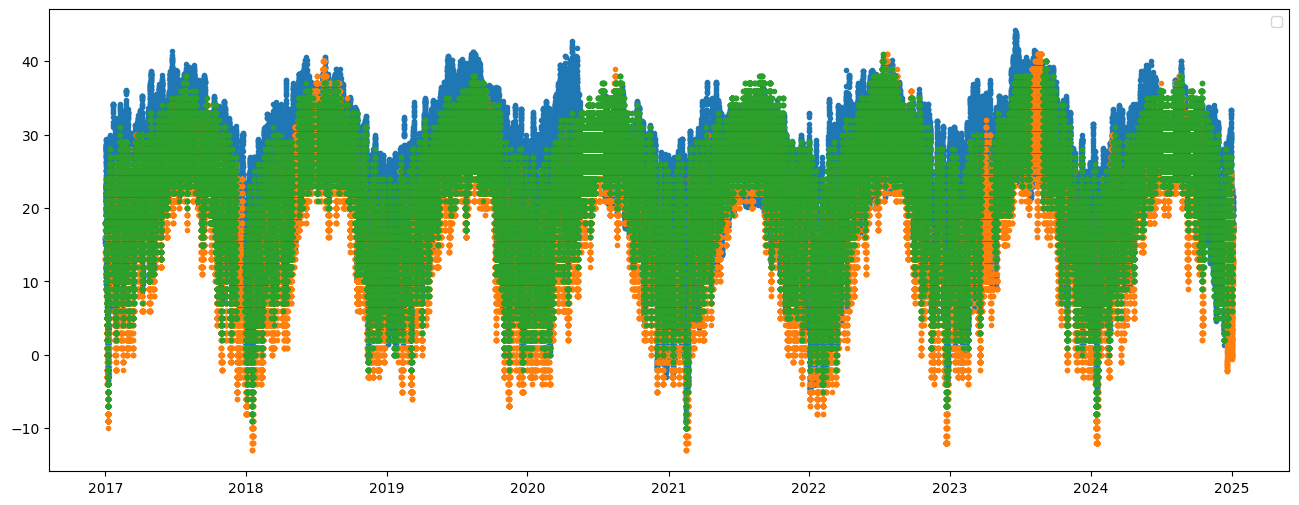

In [83]:
fig=plt.figure(figsize=(16,6), linewidth=3)
plt.plot(df_weather.set_index('timestamp')[['tmpc_1', 'tmpc_2', 'tmpc_3']],'.')
plt.legend()

C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\4273255910.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


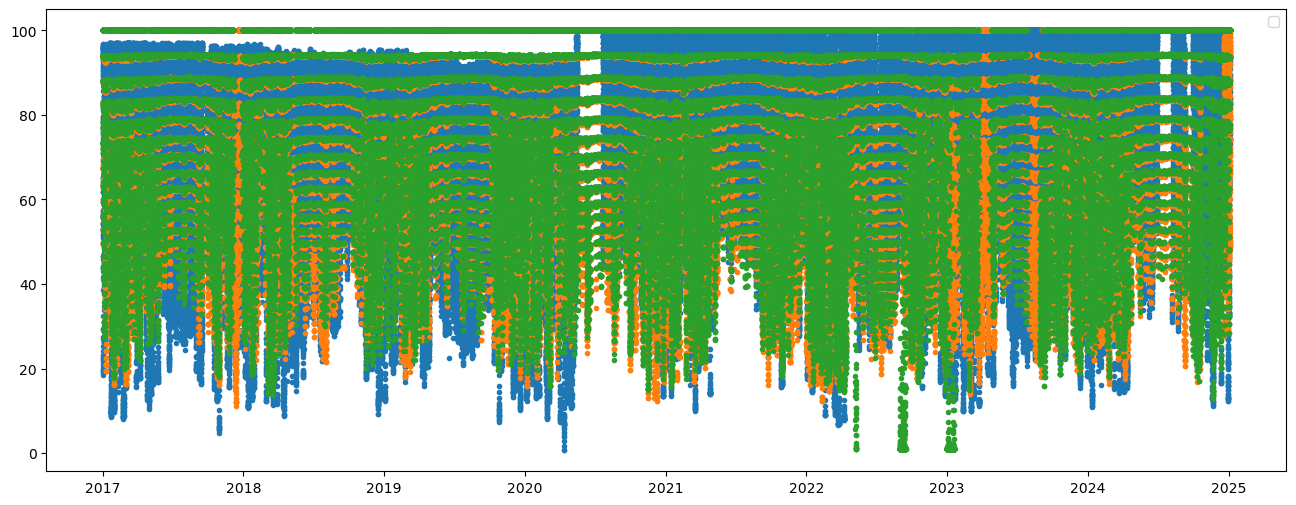

In [86]:
fig=plt.figure(figsize=(16,6), linewidth=3)
plt.plot(df_weather.set_index('timestamp')[['relh_1', 'relh_2', 'relh_3']],'.')
plt.legend()

C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\2246674014.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


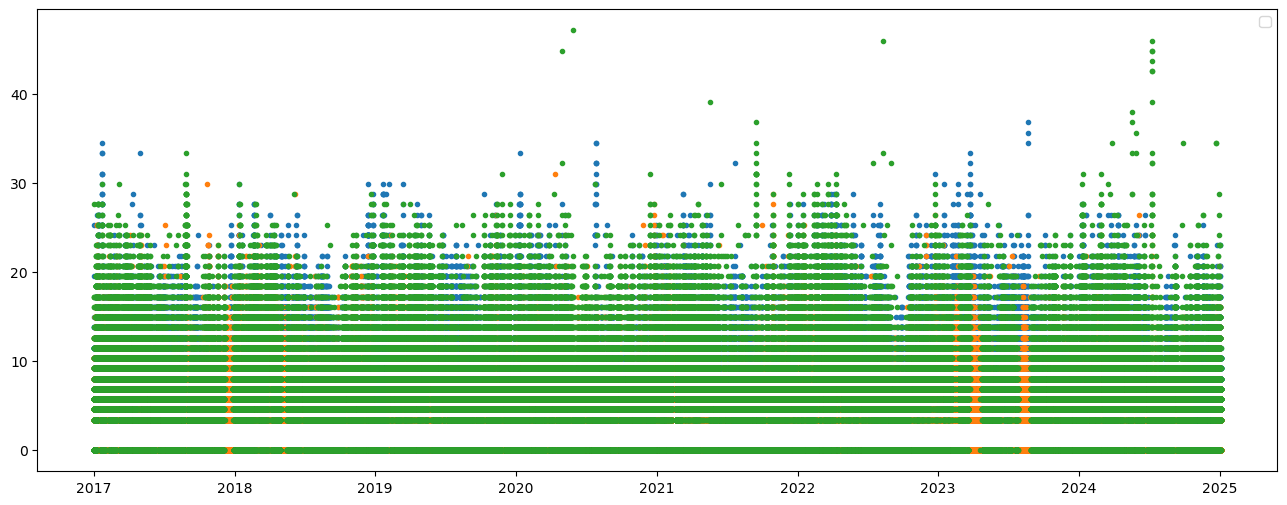

In [88]:
fig=plt.figure(figsize=(16,6), linewidth=3)
plt.plot(df_weather.set_index('timestamp')[['sped_1', 'sped_2', 'sped_3']],'.')
plt.legend()

C:\Users\sajib\AppData\Local\Temp\ipykernel_30356\821021311.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


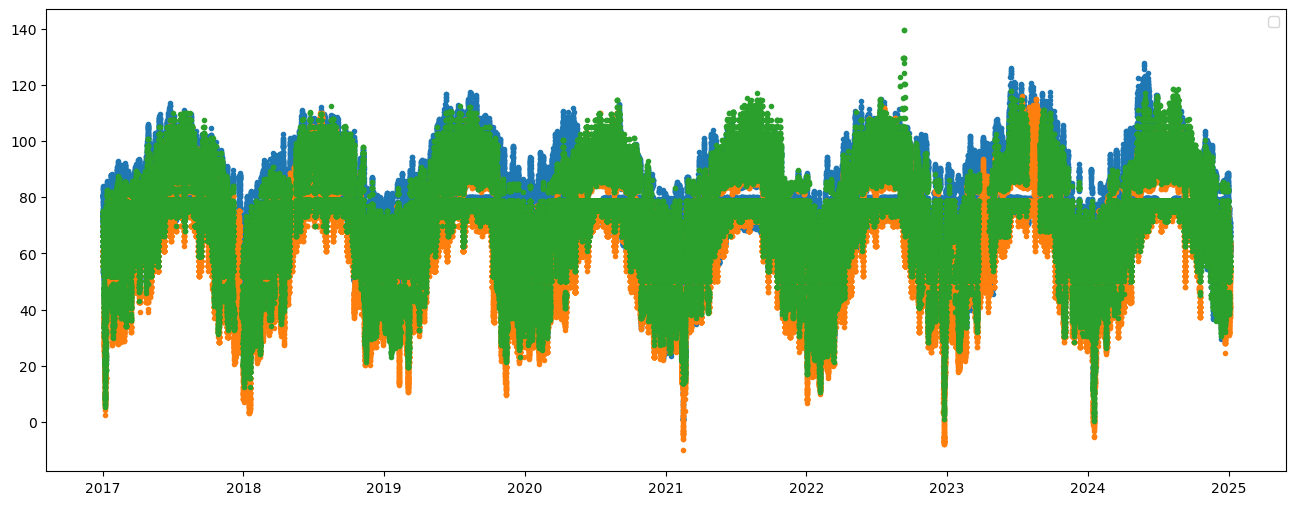

In [89]:
fig=plt.figure(figsize=(16,6), linewidth=3)
plt.plot(df_weather.set_index('timestamp')[['feel_1', 'feel_2', 'feel_3']],'.')
plt.legend()

In [92]:
df_weather.set_index('timestamp', inplace=True)

In [94]:
df_weather

,tmpc_1,relh_1,sped_1,feel_1,p01m_1,tmpc_2,relh_2,sped_2,feel_2,p01m_2,tmpc_3,relh_3,sped_3,feel_3,p01m_3
timestamp,,,,,,,,,,,,,,,
2017-01-01 00:15:00,15.28,95.80,0.00,59.5,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
2017-01-01 00:35:00,15.28,95.80,0.00,59.5,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
2017-01-01 00:55:00,15.56,96.15,8.05,59.9,0.0,13.00,100.00,3.45,55.4,0.0,18.0,100.0,0.0,64.4,0.0
2017-01-01 01:15:00,15.78,95.81,3.45,60.4,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
2017-01-01 01:35:00,16.00,95.14,0.00,60.8,0.0,13.00,100.00,0.00,55.4,0.0,18.0,100.0,0.0,64.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03 22:35:00,17.11,100.00,4.60,62.8,0.0,12.78,66.36,3.45,55.0,0.0,NaN,NaN,NaN,NaN,NaN
2025-01-03 22:55:00,17.11,100.00,4.60,62.8,0.0,12.78,66.36,3.45,55.0,0.0,NaN,NaN,NaN,NaN,NaN
2025-01-03 23:15:00,17.11,100.00,4.60,62.8,0.0,12.61,67.60,0.00,54.7,0.0,NaN,NaN,NaN,NaN,NaN


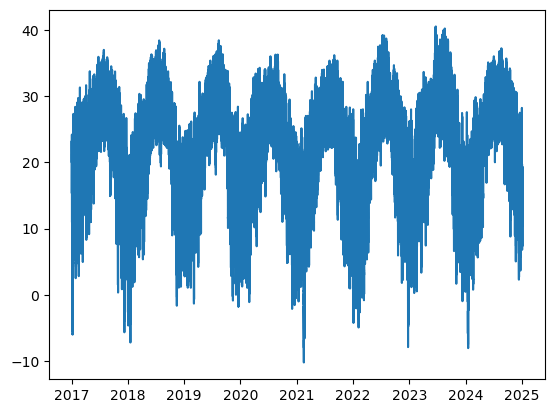

In [96]:
df_weather=df_weather.resample('60min').mean()

temp1 = df_weather[['tmpc_1', 'tmpc_2','tmpc_3']].mean(axis=1)
plt.plot(temp1)

In [107]:
df_weather

,tmpc_1,relh_1,sped_1,feel_1,p01m_1,tmpc_2,relh_2,sped_2,feel_2,p01m_2,tmpc_3,relh_3,sped_3,feel_3,p01m_3
timestamp,,,,,,,,,,,,,,,
2017-01-01 00:00:00,15.373333,95.916667,2.683333,59.633333,0.0,13.000000,100.000000,1.150000,55.400000,0.0,18.000000,100.0,0.00,64.4,0.0
2017-01-01 01:00:00,15.853333,95.360000,2.300000,60.533333,0.0,13.333333,97.896667,0.000000,56.000000,0.0,18.000000,100.0,0.00,64.4,0.0
2017-01-01 02:00:00,15.926667,95.820000,0.000000,60.666667,0.0,14.000000,95.793333,2.300000,57.200000,0.0,17.333333,100.0,0.00,63.2,0.0
2017-01-01 03:00:00,16.000000,96.393333,0.000000,60.800000,0.0,14.000000,100.000000,3.450000,57.200000,0.0,17.000000,100.0,1.15,62.6,0.0
2017-01-01 04:00:00,16.963333,93.106667,5.750000,62.533333,0.0,14.000000,95.793333,1.150000,57.200000,0.0,17.000000,100.0,0.00,62.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03 19:00:00,18.630000,89.490000,4.983333,65.533333,0.0,10.760000,79.906667,0.000000,51.366667,0.0,NaN,NaN,NaN,NaN,NaN
2025-01-03 20:00:00,17.500000,100.000000,5.750000,63.500000,0.0,12.370000,71.076667,1.150000,54.266667,0.0,NaN,NaN,NaN,NaN,NaN
2025-01-03 21:00:00,17.183333,100.000000,5.366667,62.933333,0.0,12.686667,68.320000,0.000000,54.833333,0.0,NaN,NaN,NaN,NaN,NaN


In [115]:
# df_weather_avg=pd.DataFrame()
# df_weather_avg['tmpc'] = df_weather[['tmpc_1', 'tmpc_2','tmpc_3']].mean(axis=1)
# df_weather_avg['relh'] = df_weather[['relh_1', 'relh_1','relh_1']].mean(axis=1)
# df_weather_avg['sped'] = df_weather[['sped_1', 'sped_2','sped_3']].mean(axis=1)
# df_weather_avg['feel'] = df_weather[['feel_1', 'feel_2','feel_3']].mean(axis=1)
# df_weather_avg['p01m']=df_weather[['p01m_1', 'p01m_2','p01m_3']].mean(axis=1)
# df_weather_avg['mslp']=df_weather[['mslp_1', 'mslp_2','mslp_3']].mean(axis=1)
# df_weather_avg['ice_accretion_1hr']=df_weather[['ice_accretion_1hr_1', 'ice_accretion_1hr_2','ice_accretion_1hr_3']].mean(axis=1)

In [117]:
# Merge df_scada with mergedAll_df on 'timestamp'
merged_df = pd.merge( df_weather_avg,df_load, on='timestamp')

In [119]:
merged_df

,timestamp,tmpc,relh,sped,feel,p01m,ERCOT
0,2018-01-01 01:00:00,-0.833333,91.393333,12.777778,20.792222,0.0,50567.069682
1,2018-01-01 02:00:00,-1.284444,90.400000,12.266667,20.203333,0.0,50617.087977
2,2018-01-01 03:00:00,-1.752222,91.590000,11.883333,19.276667,0.0,50694.300087
3,2018-01-01 04:00:00,-1.895556,90.946667,12.905556,18.685556,0.0,50999.591693
4,2018-01-01 05:00:00,-1.968889,89.366667,12.394444,18.707778,0.0,51723.732017
...,...,...,...,...,...,...,...
61363,2024-12-31 20:00:00,10.124444,54.446667,3.577778,49.871111,0.0,47619.264355
61364,2024-12-31 21:00:00,9.574444,63.366667,5.494444,47.508889,0.0,46737.678611
61365,2024-12-31 22:00:00,8.994444,64.966667,6.388889,46.236667,0.0,45775.649767
61366,2024-12-31 23:00:00,8.068889,65.713333,4.727778,45.061111,0.0,44779.606498


In [121]:
merged_df.to_csv(data_path+'load_and_weather_data.csv')

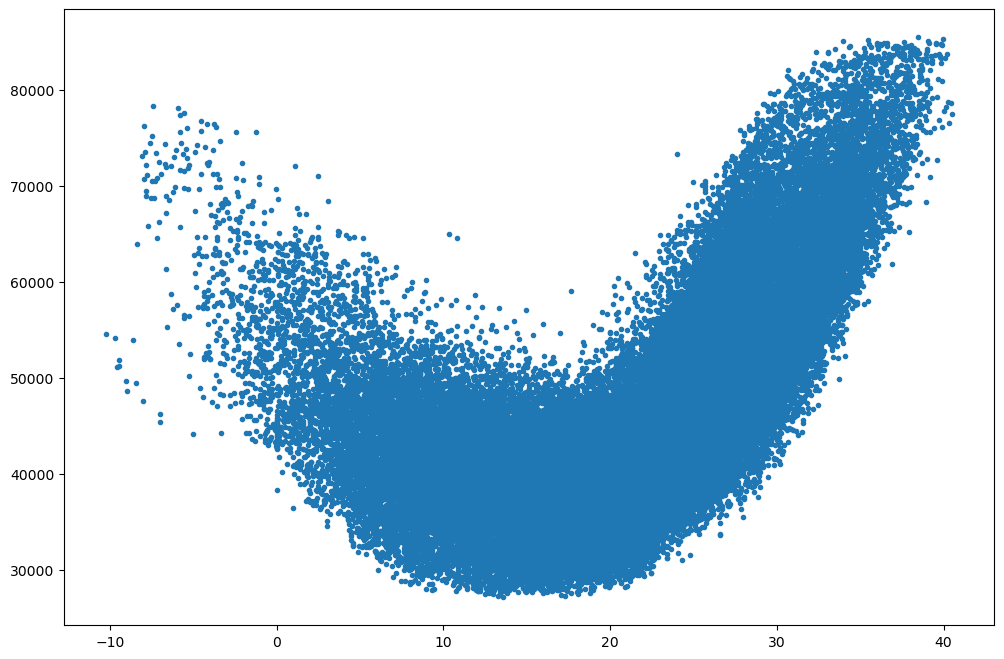

In [122]:
fig=plt.figure(figsize=(12,8))
plt.plot(merged_df['tmpc'],merged_df.ERCOT,'.')

In [125]:
# merged_df.set_index('timestamp', inplace=True)
# merged_df = merged_df.sort_index()

In [127]:
merged_df=merged_df.interpolate(method='linear')